# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [24]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [25]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [26]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [27]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [28]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [29]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [31]:
X_train.shape

(1022, 80)

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [32]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x139ee4dc0>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [33]:
preproc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x139ee4dc0>))])

In [34]:
X_train_preproc = preproc.transform(X_train)
X_val_preproc = preproc.transform(X_val)

In [35]:
pd.DataFrame(X_train_preproc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
0,0.516240,0.000000,0.375,0.021239,0.0,0.000000,0.0,0.836398,0.000000,0.333333,0.666667,0.620192,0.75,0.972727,0.344081,0.0,0.424159,0.333333,0.048583,0.236301,0.0,0.000000,0.2825,0.0,0.206501,0.500,0.888889,0.590909,0.583333,0.568309,0.000000,0.978261,0.950000,0.75,0.75,1.000000,0.166667,1.00,1.0,0.333333,1.000000,0.0,0.8,1.0,0.6,0.333333,0.6,1.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.563925,0.568523,0.500,0.000000,0.0,0.000000,0.0,0.908062,0.000000,0.666667,1.000000,0.657051,0.75,0.990909,0.646246,0.5,0.547701,0.333333,0.057108,0.284247,0.0,0.235294,0.5375,0.0,0.149140,0.500,0.888889,0.000000,0.750000,0.600749,0.168028,0.985507,0.983333,0.75,0.25,0.166667,0.166667,1.00,1.0,0.333333,1.000000,0.0,0.8,1.0,0.6,1.000000,0.6,1.0,1.000000,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.276088,0.332688,0.500,0.145575,0.0,0.333333,0.0,0.328619,0.000000,0.000000,0.666667,0.192308,0.25,0.227273,0.342239,0.0,0.341112,0.333333,0.036551,0.133562,0.0,0.176471,0.0000,0.0,0.191205,0.625,0.666667,0.000000,0.500000,0.320025,0.000000,0.384058,0.000000,0.75,0.25,0.500000,0.166667,0.50,1.0,0.666667,0.333333,1.0,0.0,1.0,0.6,0.333333,0.6,1.0,0.333333,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.143746,0.363196,0.375,0.000000,0.0,0.000000,0.0,0.353607,0.000000,0.000000,0.666667,0.451923,0.50,0.954545,0.268540,0.5,0.681537,0.333333,0.035271,0.160959,0.0,0.235294,0.0000,0.0,0.066922,0.500,0.555556,0.000000,0.333333,0.233936,0.000000,0.963768,0.933333,0.75,0.25,0.166667,0.166667,0.75,1.0,0.333333,0.333333,0.0,0.0,1.0,0.6,0.666667,0.6,1.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.277125,0.645036,0.500,0.429204,0.0,0.333333,0.0,0.078265,0.000000,0.333333,0.666667,0.698718,0.75,0.945455,0.491479,0.5,0.220316,0.333333,0.050476,0.267123,0.0,0.235294,0.2425,0.0,0.294455,0.500,0.777778,0.000000,0.666667,0.354336,0.

In [36]:
X_test_preproc = preproc.transform(X_test)

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [39]:
from tensorflow.keras import Sequential, layers

In [40]:
X.shape[-1]

80

In [41]:
def initialize_model(X):
    model = Sequential()
    
    model.add(layers.Dense(20, activation='relu', input_dim=X.shape[-1]))
    
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='msle')
    
    return model

❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [43]:
model2 = initialize_model(X_train_preproc)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                3220      
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dense_8 (Dense)             (None, 20)                320       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,116
Trainable params: 4,116
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model2.fit(X_train_preproc, y_train,
                    validation_data= (X_val_preproc, y_val),
                    epochs=300, 
                    batch_size=16,
                   verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 117.4942 - val_loss: 92.9051
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 75.4643 - val_loss: 60.7310
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 51.5772 - val_loss: 43.3052
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 37.5148 - val_loss: 32.2632
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 28.6222 - val_loss: 25.1891
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 22.6962 - val_loss: 20.2666
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 18.4602 - val_loss: 16.6482
Epoch 8/300
64/64 [==============================] - 0s 3ms/step - loss: 15.2174 - val_loss: 13.6280
Epoch 9/300
64/64 [==============================] - 0s 2ms/step - loss: 12.3716 - val_loss: 11.0929
Epoch 10/300
64/64 [==============================] - 0s 3ms/step - loss: 10.1523 - val_lo

Epoch 83/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0773 - val_loss: 0.0710
Epoch 84/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0765 - val_loss: 0.0703
Epoch 85/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0758 - val_loss: 0.0697
Epoch 86/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0751 - val_loss: 0.0690
Epoch 87/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0744 - val_loss: 0.0682
Epoch 88/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0736 - val_loss: 0.0676
Epoch 89/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0728 - val_loss: 0.0668
Epoch 90/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0720 - val_loss: 0.0662
Epoch 91/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0712 - val_loss: 0.0654
Epoch 92/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0705 - val_loss: 0.0647


64/64 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0189
Epoch 246/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0194
Epoch 247/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0189
Epoch 248/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0188
Epoch 249/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0188
Epoch 250/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0188
Epoch 251/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0189
Epoch 252/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0190
Epoch 253/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0187
Epoch 254/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.0187
Epoc

In [48]:
# 3. Evaluating the model
epochs = 300

res = model2.evaluate(X_val_preproc, y_val, verbose = 0)
print(f"RMLSE achieved after {epochs} epochs = {round(res**0.5,3)}")

RMLSE achieved after 300 epochs = 0.14


In [49]:
# 4. Looking at the lowest loss
minimium_rmlse_val = min(history.history['val_loss'])**0.5
optimal_momentum = np.argmin(history.history['val_loss'])

In [50]:
test = np.sqrt(min(history.history['val_loss']))
test

0.13946121844145376

In [51]:
print(f"Lowest RMLSE achieved = {round(minimium_rmlse_val,3)}")
print(f"This was achieved at the epoch number {optimal_momentum}") 

Lowest RMLSE achieved = 0.139
This was achieved at the epoch number 298


🎁 We coded a `plot_history` function that you can use to detect overfitting

In [52]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

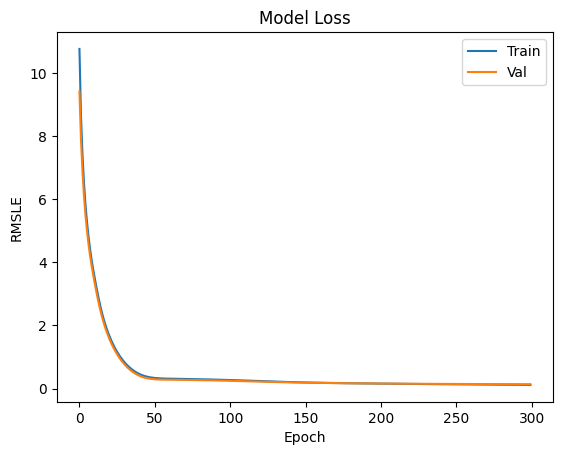

In [53]:
plot_history(history)

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [54]:
def evaluate_model(X, y, train_index, val_index):
    
    # Slicing the training set and the validation set
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Preprocessing 
    preproc = create_preproc(X_train)
    preproc.fit(X_train, y_train)
    X_train_preproc = preproc.transform(X_train)
    X_val_preproc = preproc.transform(X_val)
    
    # Training the model on the preprocessed training dataset
    model = initialize_model(X_train_preproc)
    
    history = model.fit(X_train_preproc,
                        y_train,
                        validation_data = (X_val_preproc, y_val),
                        epochs = 100,
                        batch_size=16,
                        verbose=0)
    
    # Evaluating the model on the preprocessed validation dataset
    
    return pd.DataFrame({
                'rmsle_final_epoch': [model.evaluate(X_val_preproc, y_val)**0.5],
                'rmsle_min': [np.argmin(history.history['val_loss'])**0.5]
                        })

In [3]:
from sklearn.model_selection import KFold

cv = 5
kf = KFold(n_splits = cv, shuffle = True)

In [70]:
kf_test = KFold(n_splits = 5, shuffle = True)

C = ["a", "b", "c", "d", "e", "f", "g", "h"]

for train, test in kf_test.split(C):
    print(train, test)

[0 3 4 5 6 7] [1 2]
[0 1 2 4 5 6] [3 7]
[0 1 2 3 6 7] [4 5]
[1 2 3 4 5 6 7] [0]
[0 1 2 3 4 5 7] [6]


In [71]:
%%time

results = []

fold_number = 1

for train_index, val_index in kf.split(X):
#     print(train_index)
#     print((train_index, val_index))
    print("-"*100)
    print(f"FOLD NUMBER {fold_number}")
    results.append(evaluate_model(X, y, train_index, val_index))
    fold_number += 1

----------------------------------------------------------------------------------------------------
FOLD NUMBER 1
10/10 [==============================] - 0s 1ms/step - loss: 0.0480
----------------------------------------------------------------------------------------------------
FOLD NUMBER 2
10/10 [==============================] - 0s 1ms/step - loss: 0.0830
----------------------------------------------------------------------------------------------------
FOLD NUMBER 3
10/10 [==============================] - 0s 1ms/step - loss: 0.0635
----------------------------------------------------------------------------------------------------
FOLD NUMBER 4
10/10 [==============================] - 0s 1ms/step - loss: 0.0362
----------------------------------------------------------------------------------------------------
FOLD NUMBER 5
10/10 [==============================] - 0s 4ms/step - loss: 145.2382
CPU times: user 1min 59s, sys: 40.1 s, total: 2min 39s
Wall time: 2h 1min 22s


In [50]:
final_results = pd.concat(results, axis = 0)
final_results.index = np.arange(0, len(results))

In [51]:
results

[   rmsle_final_epoch  rmsle_min
 0           0.219614   9.949874,
    rmsle_final_epoch  rmsle_min
 0           0.275096   9.949874,
    rmsle_final_epoch  rmsle_min
 0           0.234009   9.949874,
    rmsle_final_epoch  rmsle_min
 0            0.25079   9.949874,
    rmsle_final_epoch  rmsle_min
 0           0.270808   9.949874]

In [55]:
final_results

,rmsle_final_epoch,rmsle_min
0,0.219614,9.949874
1,0.275096,9.949874
2,0.234009,9.949874
3,0.250790,9.949874
4,0.270808,9.949874


### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [ ]:
!pip install --quiet dask

In [58]:
from sklearn.model_selection import KFold
from dask import delayed

cv = 5
kf = KFold(n_splits = cv, shuffle = True)
f = delayed(evaluate_model)

results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
                  ]).compute(
                      scheduler='processes', num_workers=8)

pd.concat(results, axis=0).reset_index(drop=True)

2023-08-11 12:43:31.047937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 12:43:37.223447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10/10 [==============================] - 0s 677us/step - loss: 0.0669


,rmsle_final_epoch,rmsle_min
0,0.276619,9.949874
1,0.232903,9.949874
2,0.254842,9.949874
3,0.278680,9.949874
4,0.258699,9.949874


### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation - BROKEN LINK](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

In [59]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)
    
for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback = log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/Users/bingobango/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/bingobango/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bingobango/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/bingobango/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'evaluate_model' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3:
Traceback (most recent call last):
  File "/Users/bingobango/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/bingobango/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/process.py", li

KeyboardInterrupt: 

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [45]:
predicitons = model2.predict(X_test_preproc)
predicitons

46/46 [==============================] - 0s 1ms/step


array([[118088.195],
       [150219.77 ],
       [181401.58 ],
       ...,
       [149420.95 ],
       [104600.516],
       [187662.47 ]], dtype=float32)

In [48]:
X_test_preproc.shape

(1459, 160)

In [49]:
X_test['Id'].shape

(1459,)

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [71]:
results = pd.concat([X_test['Id'], pd.Series(predicitons[:,0], name='SalePrice')], axis=1)
results

,Id,SalePrice
0,1461,116142.679688
1,1462,148600.734375
2,1463,170801.140625
3,1464,192968.156250
4,1465,201879.828125
...,...,...
1454,2915,74789.882812
1455,2916,68278.351562
1456,2917,147354.640625
1457,2918,108203.359375


📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [54]:
results.to_csv("submission_final.csv", header = True, index = False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!